In this notebook, I will make a simple wordcloud from comments on a reddit post. To parse the comments, I will use PRAW, which is a Reddit API wrapper.

In [1]:
import praw

Creating a reddit instance

In [2]:
reddit = praw.Reddit(client_id = 'CLIENT_ID',
                    client_secret = 'CLIENT_SECRET',
                    password = 'PASSWORD',
                    username = 'USERNAME',
                    user_agent = 'USER_AGENT')

In [ ]:
# This is a check to ensure that we created the reddit instance successfully. The output of this should 
# be my reddit username.
print(reddit.user.me())

Creating an instance of r/reddevils

In [4]:
subreddit = reddit.subreddit('reddevils')

In [5]:
type(subreddit)

praw.models.reddit.subreddit.Subreddit

We'll make a word cloud of the comments in the post titled, 'EUROPA LEAGUE CHAMPIONS UPVOTE PARTY'

Each post in a subreddit has a six character ID which can be seen in the URL of that post. For our post, the ID is 6d4vhq, as seen from the URL. https://www.reddit.com/r/reddevils/comments/6d4vhq/europa_league_champions_upvote_party/

In [12]:
for submission in subreddit.top('all'):
    if submission == '6d4vhq':
        print (submission.title)

EUROPA LEAGUE CHAMPIONS UPVOTE PARTY


Comments on Reddit posts are structured as trees. Let's check out the first order comments to the post. For clarity, we will separate the comments with hyphens.

In [14]:
for submission in subreddit.top('all'):
    if submission == '6d4vhq':
        for comment in submission.comments:
            print(25*'-')
            print(comment.body)

-------------------------
[We upset a few people last night it seems.](http://i.imgur.com/bYcXzT4.png)


Edit; The moderation log is a warzone. We removed close to 400 posts in the past 12 hours, and something close to 500 in the last 24 hours. You shitposters...
-------------------------
Everybody get the fuck in. 
Valencia is a tank 
-------------------------
WOKE UP THIS MORNING FEELING FUCKING FINE
-------------------------
CHAMPIONS LEAGUE AND 3 TROPHIES?!  GET IN!
-------------------------
FUCK IT. THIS ONE! NO MORE THOUGH!
-------------------------
I FEEL SO GOOD RIGHT NOW
-------------------------
I LOVE YOU ALL
-------------------------
DICKS OUT LADS!
-------------------------
So many crutches on the pitch.
-------------------------
FOR THOSE OF YOU TALKING ABOUT 5 ENGLISH TEAMS IN THE CL NEXT YEAR, REMEMBER THAT LIVERPOOL HAVEN'T QUALIFIED YET
-------------------------
UNITED!! UNITED!! 
-------------------------
GRIEZMANN 10/10!!!!
-------------------------
I'M NOT CRYING O

AttributeError: 'MoreComments' object has no attribute 'body'

Right now, we have just the first order comments. We need the rest of them as well for our wordcloud. We will make a function to gather all comments in a list.

In [24]:
def getcomments(subreddit, ID):
    ### gets all the comments from a specific subreddit post and returns them in a list
    for submission in subreddit.top('all'):
        if submission == ID:
            submission.comments.replace_more(limit=0)
            all_comments = []
            for comment in submission.comments:
                all_comments.append(comment.body)
    return all_comments

In [25]:
comment_list = getcomments(subreddit, '6d4vhq')

In [26]:
comment_list

['[We upset a few people last night it seems.](http://i.imgur.com/bYcXzT4.png)\n\n\nEdit; The moderation log is a warzone. We removed close to 400 posts in the past 12 hours, and something close to 500 in the last 24 hours. You shitposters...',
 'Everybody get the fuck in. \nValencia is a tank ',
 'WOKE UP THIS MORNING FEELING FUCKING FINE',
 'CHAMPIONS LEAGUE AND 3 TROPHIES?!  GET IN!',
 'FUCK IT. THIS ONE! NO MORE THOUGH!',
 'I FEEL SO GOOD RIGHT NOW',
 'I LOVE YOU ALL',
 'DICKS OUT LADS!',
 'So many crutches on the pitch.',
 "FOR THOSE OF YOU TALKING ABOUT 5 ENGLISH TEAMS IN THE CL NEXT YEAR, REMEMBER THAT LIVERPOOL HAVEN'T QUALIFIED YET",
 'UNITED!! UNITED!! ',
 'GRIEZMANN 10/10!!!!',
 "I'M NOT CRYING OF HAPPINESS",
 'W.O.W.',
 'FOR MANCHESTER!',
 'Get the fuck in!',
 '<---- Number of Manchester United supporters buzzing about winning the 2016/17 UEFA Europa League, signing ~~Antoine Griezmann~~ Romelu Lukaku, qualifying for the 2017/18 UEFA Champions League, & the 2017 UEFA Super 

In [28]:
# Importing modules we need for out wordcloud
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [60]:
comment_list = str(comment_list)

In [61]:
comment_list

'[\'[We upset a few people last night it seems.](http://i.imgur.com/bYcXzT4.png)\\n\\n\\nEdit; The moderation log is a warzone. We removed close to 400 posts in the past 12 hours, and something close to 500 in the last 24 hours. You shitposters...\', \'Everybody get the fuck in. \\nValencia is a tank \', \'WOKE UP THIS MORNING FEELING FUCKING FINE\', \'CHAMPIONS LEAGUE AND 3 TROPHIES?!  GET IN!\', \'FUCK IT. THIS ONE! NO MORE THOUGH!\', \'I FEEL SO GOOD RIGHT NOW\', \'I LOVE YOU ALL\', \'DICKS OUT LADS!\', \'So many crutches on the pitch.\', "FOR THOSE OF YOU TALKING ABOUT 5 ENGLISH TEAMS IN THE CL NEXT YEAR, REMEMBER THAT LIVERPOOL HAVEN\'T QUALIFIED YET", \'UNITED!! UNITED!! \', \'GRIEZMANN 10/10!!!!\', "I\'M NOT CRYING OF HAPPINESS", \'W.O.W.\', \'FOR MANCHESTER!\', \'Get the fuck in!\', \'<---- Number of Manchester United supporters buzzing about winning the 2016/17 UEFA Europa League, signing ~~Antoine Griezmann~~ Romelu Lukaku, qualifying for the 2017/18 UEFA Champions League, & 

In [62]:
stopwords = set(STOPWORDS)

There are lots of links in the entire thread. As a result, 'https' appears in our wordcloud. However, this is not an important word so we will add it in our stopwords.

In [63]:
stopwords.add("https")

In [67]:
wc = WordCloud(background_color='white', max_words = 200, stopwords=stopwords)

In [68]:
wc.generate(comment_list)

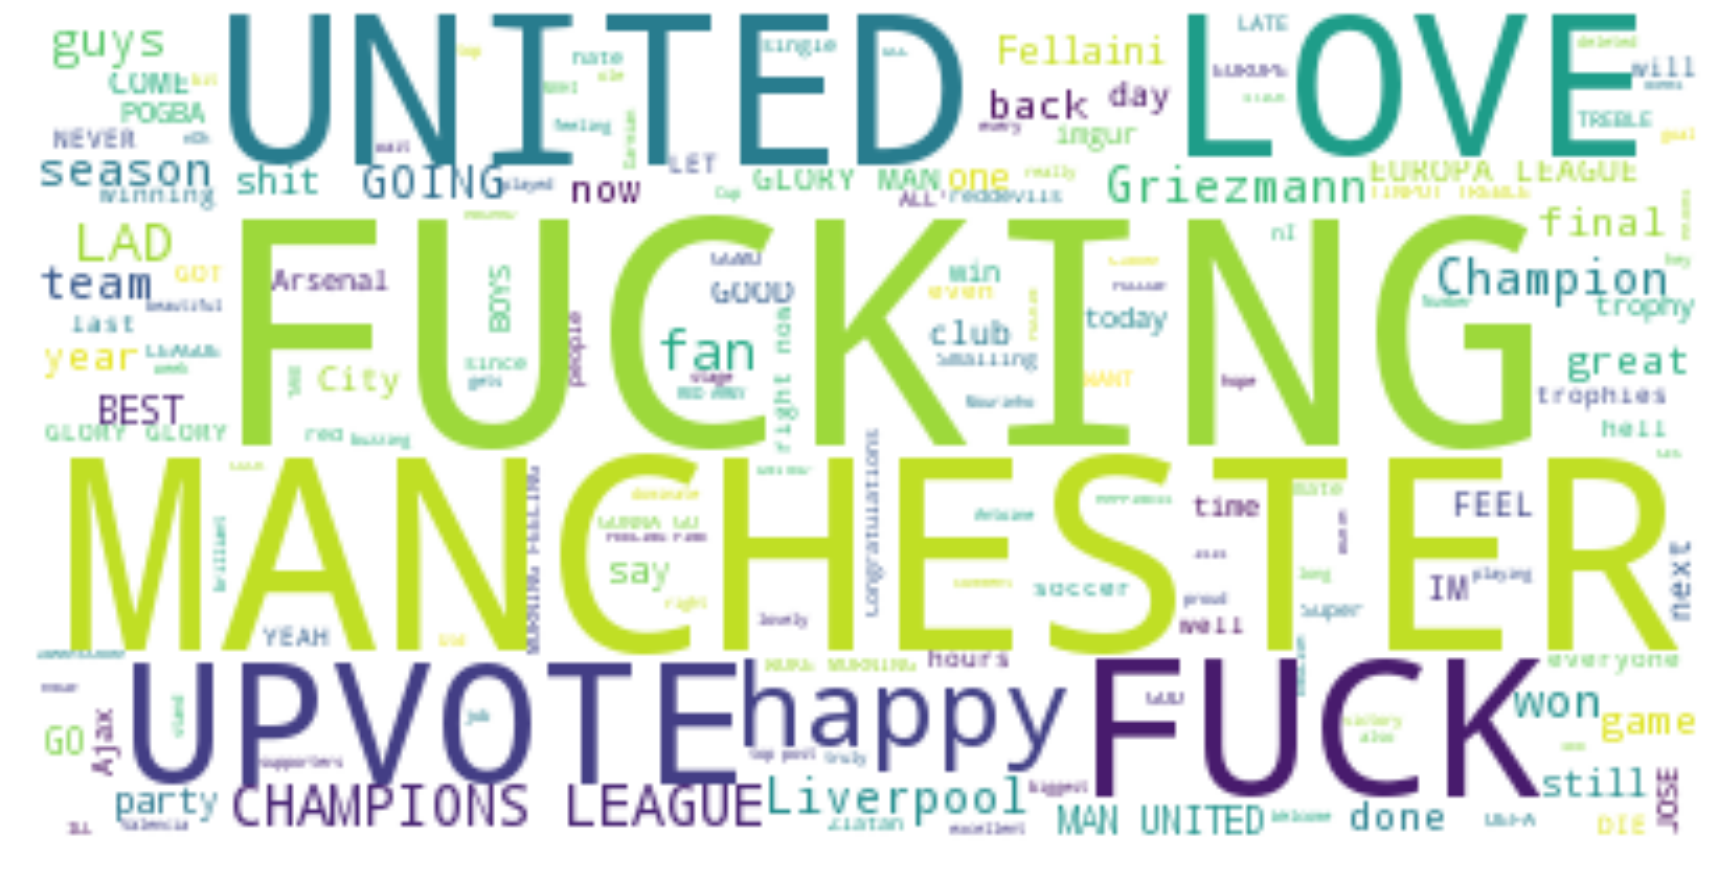

In [72]:
plt.figure(figsize=(30,30))
plt.imshow(wc, interpolation = 'bilinear', cmap = 'viridis')
plt.axis("off")
plt.savefig('wordcloud.png')
plt.show()

The folks at r/reddevils seem to be fu...n.